In [1]:
import tensorflow as tf
tf.__version__

'2.0.0'

<img src="https://qph.fs.quoracdn.net/main-qimg-e657c195fc2696c7d5fc0b1e3682fde6"/>

In [2]:
from tensorflow.keras.applications import VGG16

In [126]:
model = VGG16()

In [127]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
import cv2
import numpy as np

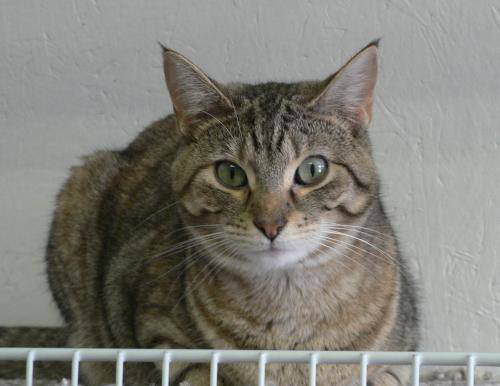

In [4]:
sample_image =  "../data/dog_cat_small_data/cat.103.jpg"
from PIL import Image
Image.open(sample_image)

In [36]:
image = cv2.imread(sample_image)

In [5]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [38]:
image.shape
image = cv2.resize(image, (224, 224))

In [39]:
image.shape

(224, 224, 3)

In [40]:
image = preprocess_input(image)

In [41]:
image.shape

(224, 224, 3)

In [42]:
model.input_shape

(None, 224, 224, 3)

In [43]:
image = np.expand_dims(image, axis=0)

In [44]:
np.argmax(model.predict(image))

281

In [45]:
decode_predictions(model.predict(image))

[[('n02123045', 'tabby', 0.4936011),
  ('n02124075', 'Egyptian_cat', 0.29638064),
  ('n02123159', 'tiger_cat', 0.17889975),
  ('n02127052', 'lynx', 0.0060675014),
  ('n02971356', 'carton', 0.0056800405)]]

In [6]:
model2 = VGG16(include_top=False)

In [7]:
model2.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [8]:
#Featre Extraction

In [9]:
def pre_process_vgg(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = preprocess_input(image)
    image = np.expand_dims(image, axis=0)
    result = model2.predict(image)
    return result              

In [10]:
image_feature = pre_process_vgg(sample_image)

In [11]:
image_feature.shape

(1, 7, 7, 512)

In [12]:
data = "../data/data_generator_small/"

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [128]:
idg = ImageDataGenerator(preprocessing_function=preprocess_input)
predict_generator = idg.flow_from_directory(data, target_size=(224, 224), batch_size=256, shuffle=False)

Found 401 images belonging to 2 classes.


In [129]:
labels = predict_generator.labels

In [147]:
labels = labels.reshape((401, 1))

In [130]:
# for i in predict_generator:
#     break
# i[0].shape, i[1].shape

In [131]:
results = model2.predict_generator(predict_generator)

In [132]:
results.shape

(401, 7, 7, 512)

In [133]:
results[0].shape

(7, 7, 512)

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.activations import relu, softmax

In [135]:
model3 = Sequential()
model3.add(Flatten( input_shape=(7,7,512)))
model3.add(Dense(512, activation=relu))
model3.add(Dense(2, activation=softmax))

In [136]:
7*7*512

25088

In [137]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 1026      
Total params: 12,846,594
Trainable params: 12,846,594
Non-trainable params: 0
_________________________________________________________________


In [142]:
from sklearn.preprocessing import OneHotEncoder

In [149]:
labels_ = OneHotEncoder().fit_transform(labels)

In [138]:
model3.compile(optimizer=SGD(), loss=categorical_crossentropy, metrics=["acc"])

In [153]:
model3.fit(results, labels_.toarray(), epochs=20, validation_split=0.2)

Train on 320 samples, validate on 81 samples
Epoch 1/20
320/320 [==============================] - 1s 3ms/sample - loss: 177.6522 - acc: 0.7156 - val_loss: 0.0363 - val_acc: 0.9877
Epoch 2/20
320/320 [==============================] - 0s 1ms/sample - loss: 1.8274 - acc: 0.9812 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 3/20
320/320 [==============================] - 0s 1ms/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0166 - val_acc: 0.9877
Epoch 4/20
320/320 [==============================] - 0s 1ms/sample - loss: 4.3688e-04 - acc: 1.0000 - val_loss: 0.0181 - val_acc: 0.9877
Epoch 5/20
320/320 [==============================] - 0s 1ms/sample - loss: 3.1920e-04 - acc: 1.0000 - val_loss: 0.0191 - val_acc: 0.9877
Epoch 6/20
320/320 [==============================] - 0s 1ms/sample - loss: 2.5416e-04 - acc: 1.0000 - val_loss: 0.0199 - val_acc: 0.9877
Epoch 7/20
320/320 [==============================] - 0s 1ms/sample - loss: 2.1125e-04 - acc: 1.0000 - val_loss: 0.0207 - val_acc: 0.9877